In [1]:
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt 

## Geometric Brownian Motion

In [58]:
S = 100 
K = 100
r = 0.03 
sigma = 0.25

N = 1000
T = 1
dt = T / N
t = np.linspace(1e-5, 1 - 1e-5, N)

rv = np.random.normal(0, sigma, N)

In [59]:
stock_process = np.zeros(N)

B = np.cumsum(rv * np.sqrt(dt))
stock_process = 100 * np.exp((r - 0.5 * sigma**2) * dt + sigma * B)

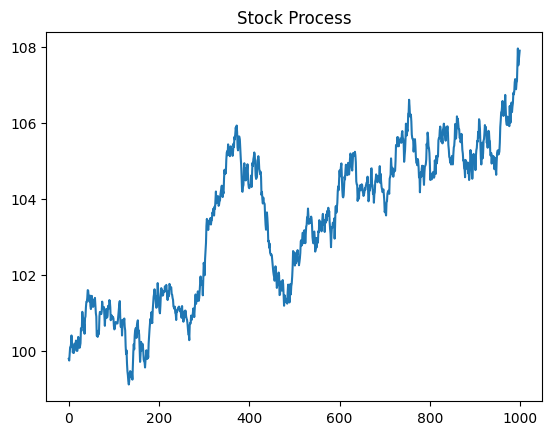

In [60]:
plt.plot(stock_process)
plt.title("Stock Process")
plt.show()

## Black Scholes Model

In [61]:
def d1(S, K, T, r, sigma):
    
    return (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, r, sigma):
    
    return d1(S, K, T, r, sigma) - sigma * np.sqrt(T)

In [62]:
def bs_call(S, K, T, r, sigma):
    
    return S * norm.cdf(d1(S, K, T, r, sigma)) - K * np.exp(-r * T) * norm.cdf(d2(S, K, T, r, sigma))

In [63]:
def get_delta(S, K, T, r, sigma):
    
    return norm.cdf(d1(S, K, T, r, sigma))

## Compute Option Price at Each Point

In [64]:
price = np.zeros(N)

for i in range(N): 
    
    price[i] = bs_call(stock_process[i], K, 1 - t[i], r, sigma)

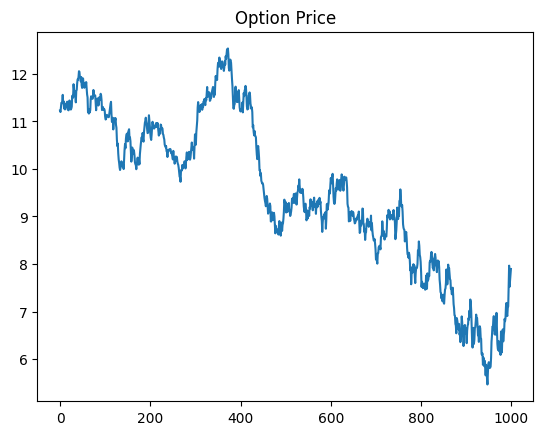

In [65]:
plt.plot(price)
plt.title("Option Price")
plt.show()

## Compute Delta at Each Point

In [66]:
delta = np.zeros(N)

for i in range(N): 
    
    delta[i] = get_delta(stock_process[i], K, 1 - t[i], r, sigma)

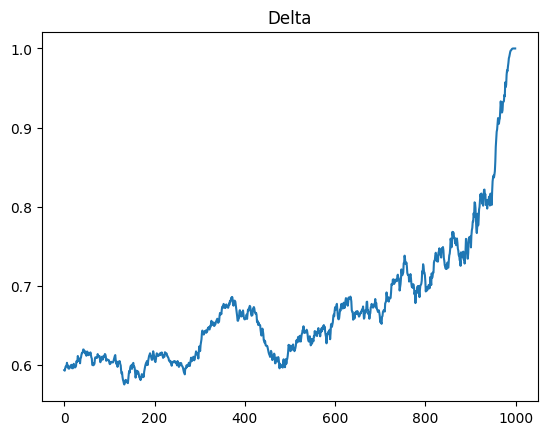

In [67]:
plt.plot(delta)
plt.title("Delta")
plt.show()

## Self Financing Wealth Process

In [68]:
pi_process = np.zeros(N)
pi_process[0] = price[0]
print("Initial Price: ", price[0])

Initial Price:  11.229902443433232


In [69]:
y = price[0]

for i in range(1, N):
    
    pi_process[i] = ((delta[i] - delta[i - 1]) * stock_process[i]) + (y * np.exp(-r * dt))
    y = pi_process[i] - ((delta[i] - delta[i - 1]) * stock_process[i])

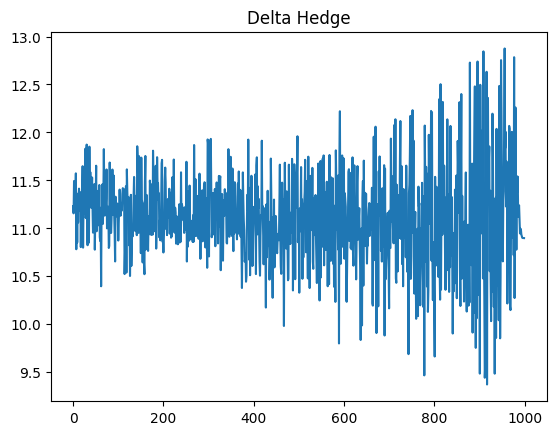

In [70]:
plt.plot(pi_process)
plt.title("Delta Hedge")
plt.show()

In [71]:
print("Option Price: ", price[0])
print("Hedging Process: ", pi_process[-1])

Option Price:  11.229902443433232
Hedging Process:  10.898335613579551


## Repeat, But for Five Stock Simulations

In [16]:
simulations = np.zeros((5, N))

for i in range(5):
    
    rv = np.random.normal(0, 1, N)
    temp = np.zeros(N)    
    B = np.cumsum(rv * np.sqrt(dt))
    temp = 100 * np.exp((r - 0.5 * sigma**2) * dt + sigma * B)
    simulations[i] = temp

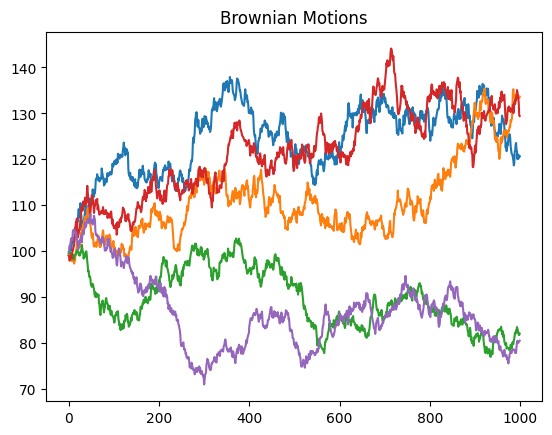

In [17]:
plt.plot(simulations.T)
plt.title("Brownian Motions")
plt.show()

In [18]:
option_prices = np.zeros((5, N))

for i in range(5):
    
    temp = np.zeros(N)
    
    for j in range(N):
    
        temp[j] = bs_call(simulations[i][j], K, 1 - t[j], r, sigma)
        
    option_prices[i] = temp

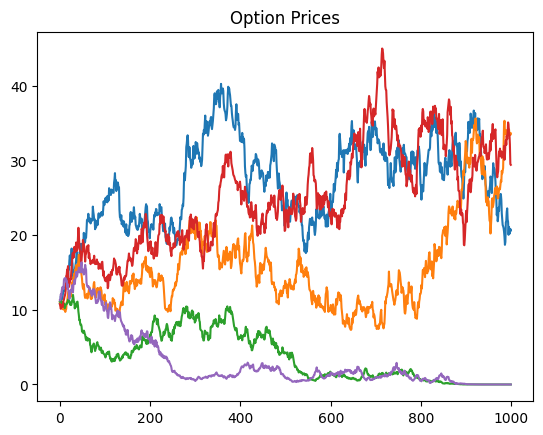

In [19]:
plt.plot(option_prices.T)
plt.title("Option Prices")
plt.show()

In [20]:
option_deltas = np.zeros((5, N))

for i in range(5): 
    
    temp = np.zeros(N)
    
    for j in range(N):
    
        temp[j] = get_delta(simulations[i][j], K, 1 - t[j], r, sigma)
        
    option_deltas[i] = temp

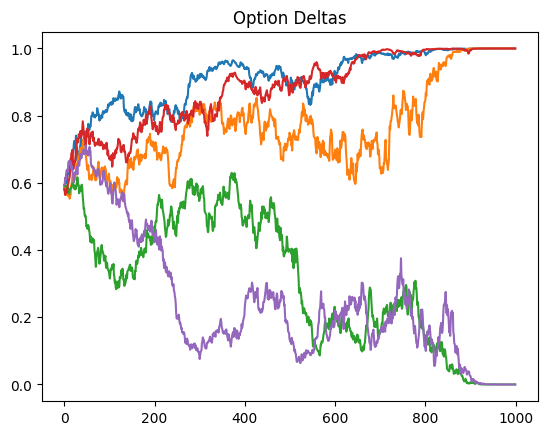

In [21]:
plt.plot(option_deltas.T)
plt.title("Option Deltas")
plt.show()

In [22]:
for i in range(5):
    
    pi_process = np.zeros(N)
    pi_process[0] = price[0]
    print("Initial Price: ", price[0])

    y = option_prices[i][1]

    for j in range(1, N):

        pi_process[j] = ((option_deltas[i][j] - option_deltas[i][j - 1]) * simulations[i][j]) + (y * np.exp(-r * dt))
        y = pi_process[j] - ((option_deltas[i][j] - option_deltas[i][j - 1]) * simulations[i][j])
        
    print("Delta Hedge: ", pi_process[-1])
    print("\n")

Initial Price:  11.331388976491795
Delta Hedge:  10.480135017157977


Initial Price:  11.331388976491795
Delta Hedge:  10.360454662201475


Initial Price:  11.331388976491795
Delta Hedge:  10.815160599985568


Initial Price:  11.331388976491795
Delta Hedge:  10.227143719362893


Initial Price:  11.331388976491795
Delta Hedge:  10.948958003887983




## Iron Condor Spread

In [85]:
S = 100 
r = 0.03 
sigma = 0.25
strikes = np.array([90, 100, 120, 130])

N = 1000
T = 1
dt = T / N
t = np.linspace(1e-5, 1 - 1e-5, N)

rv = np.random.normal(0, sigma, N)

In [86]:
stock_process = np.zeros(N)

B = np.cumsum(rv * np.sqrt(dt))
stock_process = 100 * np.exp((r - 0.5 * sigma**2) * dt + sigma * B)

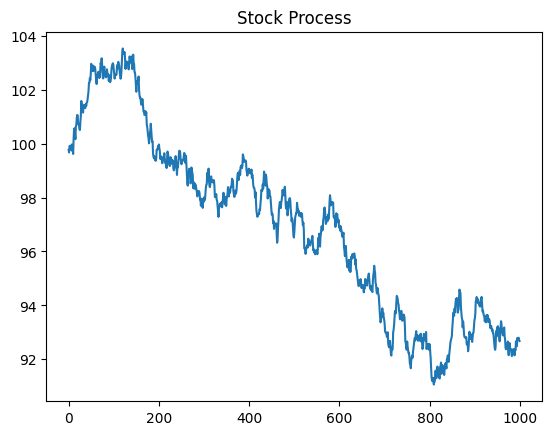

In [87]:
plt.plot(stock_process)
plt.title("Stock Process")
plt.show()

## Iron Condor Structure

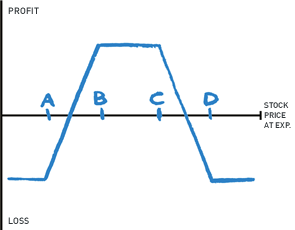

## A. Long Call 

## B. Short Call 

## C. Short Call 

## D. Long Call

In [88]:
iron_condor_price = np.zeros(N)

for i in range(N): 
    
    temp = 0
    
    for K in strikes:
        temp += bs_call(stock_process[i], K, 1 - t[i], r, sigma)
    
    iron_condor_price[i] = temp

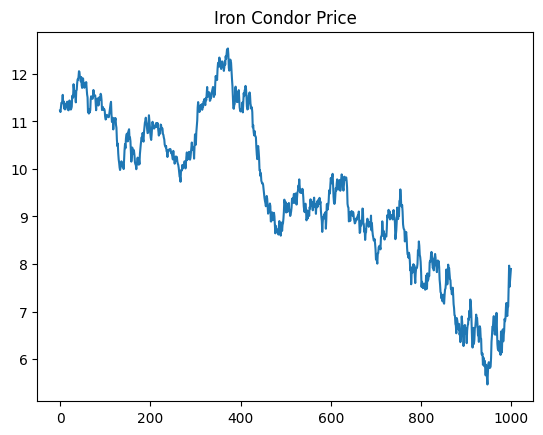

In [89]:
plt.plot(price)
plt.title("Iron Condor Price")
plt.show()

## Iron Condor Delta

In [90]:
iron_condor_delta = np.zeros(N)

for i in range(N): 
    
    temp = 0
    
    for K in strikes:
        temp += get_delta(stock_process[i], K, 1 - t[i], r, sigma)
    
    iron_condor_delta[i] = temp

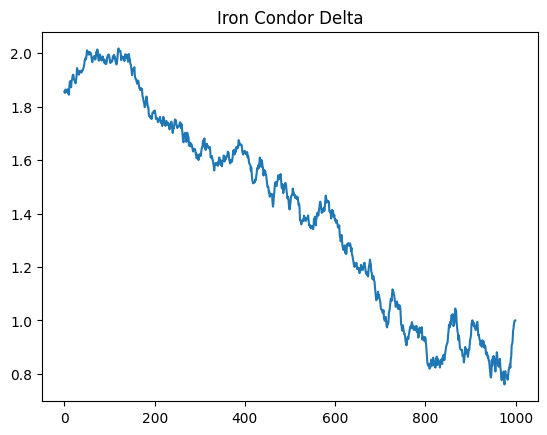

In [91]:
plt.plot(iron_condor_delta)
plt.title("Iron Condor Delta")
plt.show()

In [92]:
pi_process = np.zeros(N)
pi_process[0] = iron_condor_price[0]
print("Initial Price: ", iron_condor_price[0])

Initial Price:  35.01386660156231


In [93]:
y = iron_condor_price[0] 

for i in range(1, N):
    
    pi_process[i] = ((iron_condor_delta[i] - iron_condor_delta[i - 1]) * stock_process[i]) + (y * np.exp(-r * dt))
    y = pi_process[i] - ((iron_condor_delta[i] - iron_condor_delta[i - 1]) * stock_process[i]) 

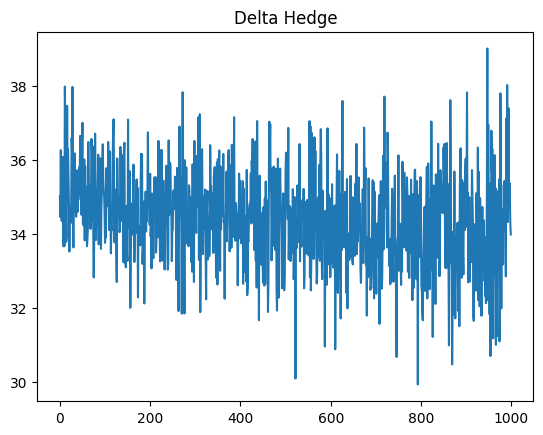

In [94]:
plt.plot(pi_process)
plt.title("Delta Hedge")
plt.show()

In [95]:
print("Iron Condor Price: ", iron_condor_price[0])
print("Delta Hedge:", pi_process[-1])

Iron Condor Price:  35.01386660156231
Delta Hedge: 33.988160349398086
